# AI HW4 Decision Tree

## Part 1 Data Observing

### Prepare the environment and import all library we need

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Data Loading  
以pandas讀取csv格式的dataset  

In [3]:
# 以pandas讀取csv格式的dataset
training_data_df = pd.read_csv('data/train.csv',encoding='utf-8-sig')
testing_data_df = pd.read_csv('data/test.csv',encoding='utf-8-sig')

### Observing Data

觀察training data
* 共576筆資料，12項特徵，資料型態有int、float
* 各筆資料皆無缺值

In [4]:
# 觀察training_data_df資料數量、型態，與確認缺失值
print("training_data_df:")
print(training_data_df.info())
print("================================")
print(training_data_df.isnull().sum())

training_data_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           576 non-null    int64  
 1   nums/length username  576 non-null    float64
 2   fullname words        576 non-null    int64  
 3   nums/length fullname  576 non-null    float64
 4   name==username        576 non-null    int64  
 5   description length    576 non-null    int64  
 6   external URL          576 non-null    int64  
 7   private               576 non-null    int64  
 8   #posts                576 non-null    int64  
 9   #followers            576 non-null    int64  
 10  #follows              576 non-null    int64  
 11  fake                  576 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 54.1 KB
None
profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
na

* profile pic、fullname words、name==username、external URL、private、fake 為離散變數，其餘為連續變數

['profile pic', 'nums/length username', 'fullname words', 'nums/length fullname', 'name==username', 'description length', 'external URL', 'private', '#posts', '#followers', '#follows']
       profile pic  nums/length username  fullname words  \
count   576.000000            576.000000      576.000000   
mean      0.701389              0.163837        1.460069   
std       0.458047              0.214096        1.052601   
min       0.000000              0.000000        0.000000   
25%       0.000000              0.000000        1.000000   
50%       1.000000              0.000000        1.000000   
75%       1.000000              0.310000        2.000000   
max       1.000000              0.920000       12.000000   

       nums/length fullname  name==username  description length  external URL  \
count            576.000000      576.000000          576.000000    576.000000   
mean               0.036094        0.034722           22.623264      0.116319   
std                0.125121    

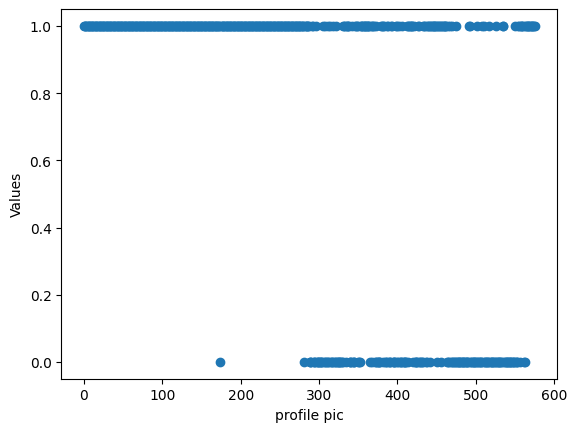

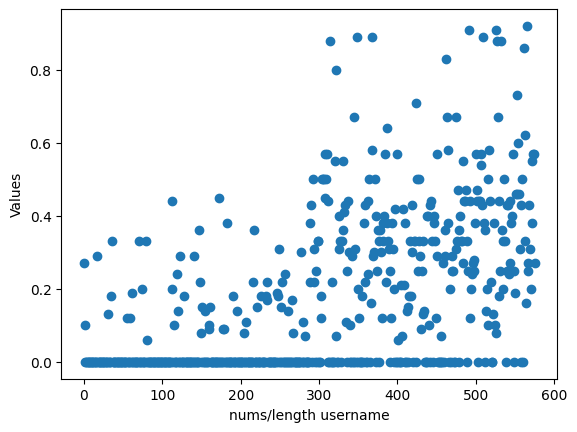

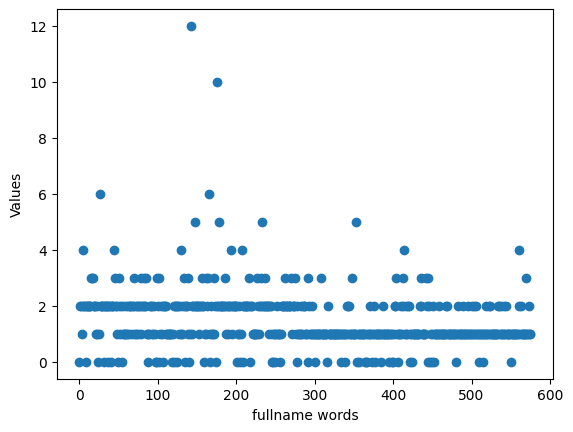

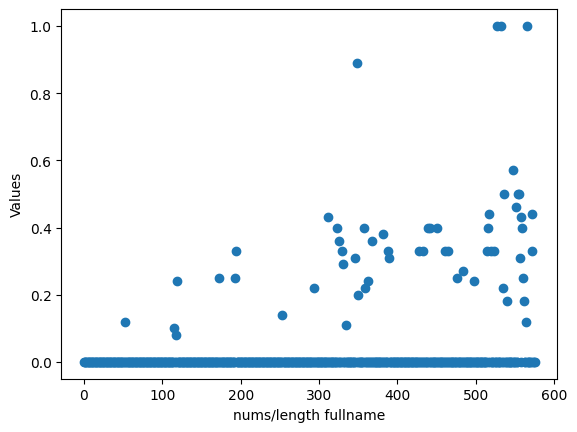

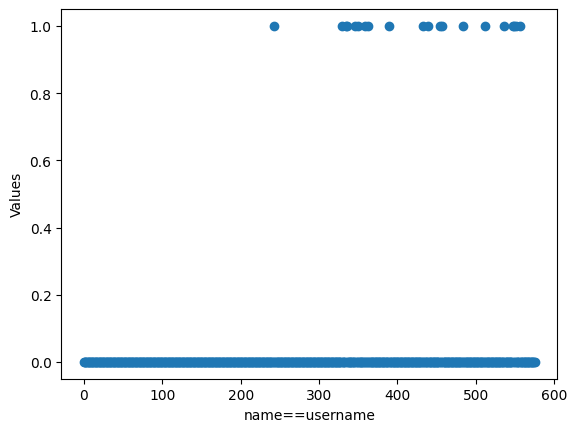

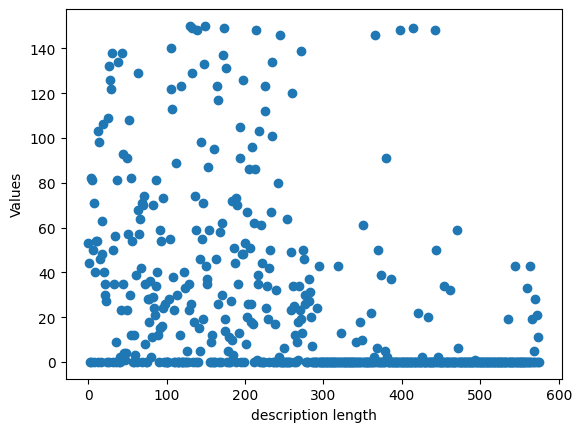

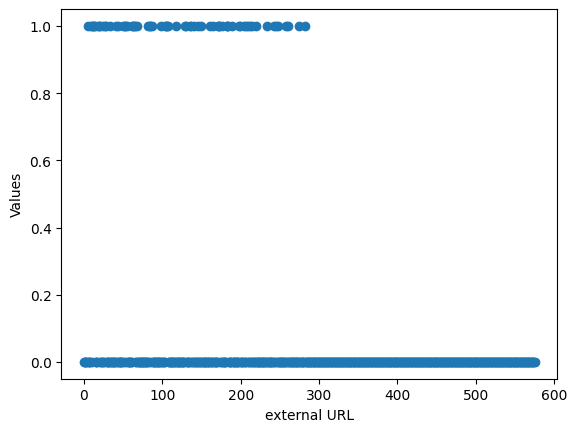

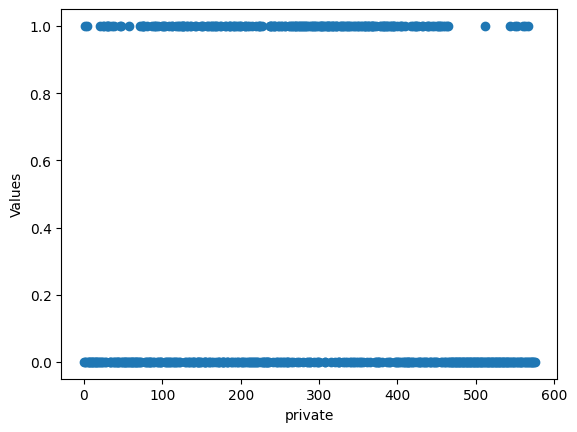

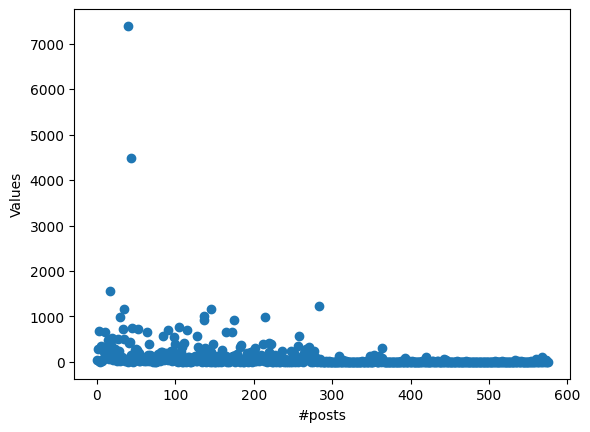

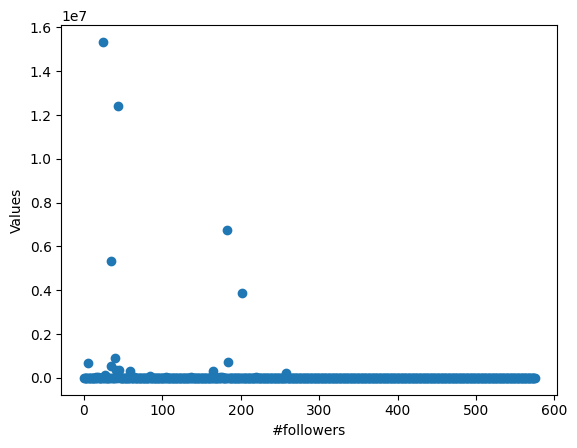

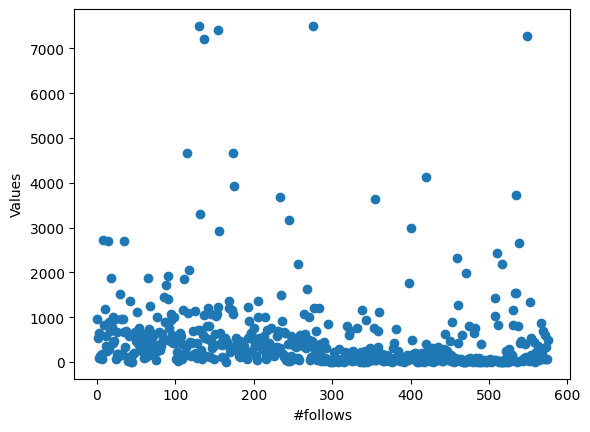

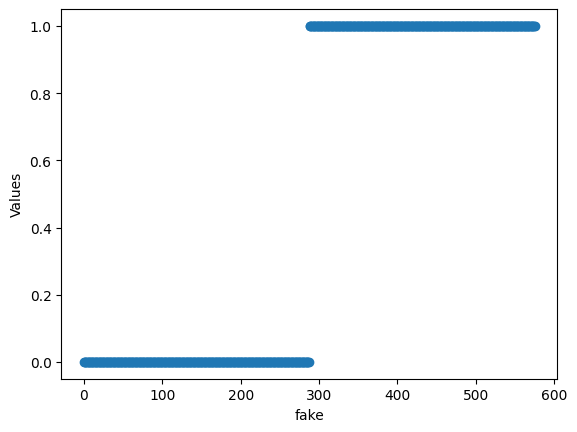

In [6]:
features = [col for col in training_data_df.columns if col != 'fake']
print(features)
print("================================")
print(training_data_df.describe())          #觀察資料之各特徵，觀察離散與連續變數
print("================================")
for feature in training_data_df.columns:
    plt.scatter(training_data_df.index, training_data_df[feature], label=feature)
    plt.xlabel(feature)
    plt.ylabel('Values')
    plt.show()

### 觀察testing data
* 共120筆資料，12項特徵，資料型態有int、float
* 各筆資料皆無缺值

In [10]:
# 觀察testing_data_df資料數量、型態，與確認缺失值
print("testing_data_df:")
print(testing_data_df.info())
print("================================")
print(testing_data_df.isnull().sum())

testing_data_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           120 non-null    int64  
 1   nums/length username  120 non-null    float64
 2   fullname words        120 non-null    int64  
 3   nums/length fullname  120 non-null    float64
 4   name==username        120 non-null    int64  
 5   description length    120 non-null    int64  
 6   external URL          120 non-null    int64  
 7   private               120 non-null    int64  
 8   #posts                120 non-null    int64  
 9   #followers            120 non-null    int64  
 10  #follows              120 non-null    int64  
 11  fake                  120 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 11.4 KB
None
profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
nam

       profile pic  nums/length username  fullname words  \
count   120.000000            120.000000      120.000000   
mean      0.758333              0.179917        1.550000   
std       0.429888              0.241492        1.187116   
min       0.000000              0.000000        0.000000   
25%       1.000000              0.000000        1.000000   
50%       1.000000              0.000000        1.000000   
75%       1.000000              0.330000        2.000000   
max       1.000000              0.890000        9.000000   

       nums/length fullname  name==username  description length  external URL  \
count            120.000000      120.000000          120.000000    120.000000   
mean               0.071333        0.041667           27.200000      0.100000   
std                0.209429        0.200664           42.588632      0.301258   
min                0.000000        0.000000            0.000000      0.000000   
25%                0.000000        0.000000           

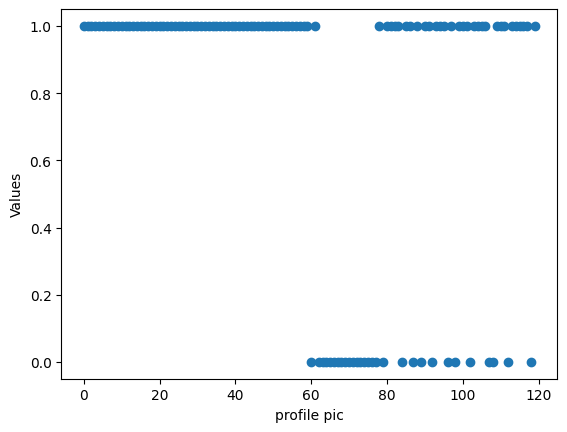

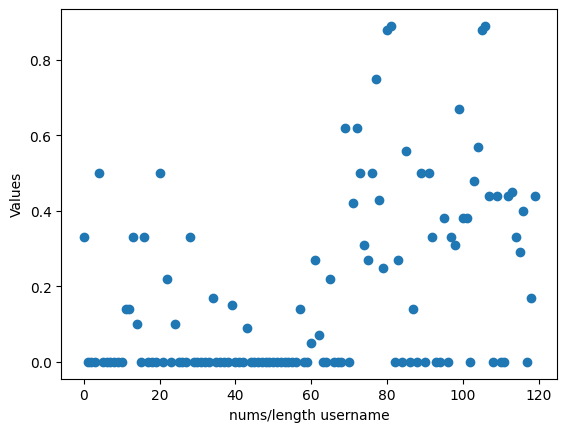

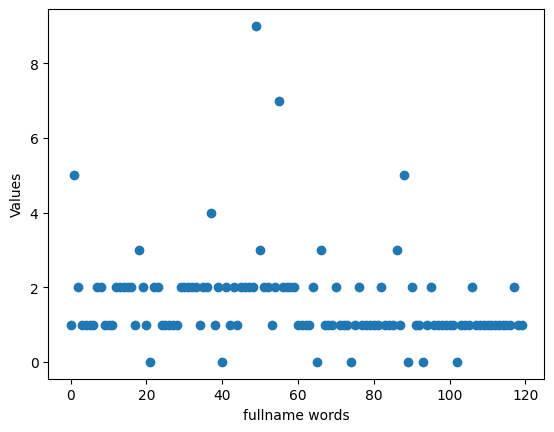

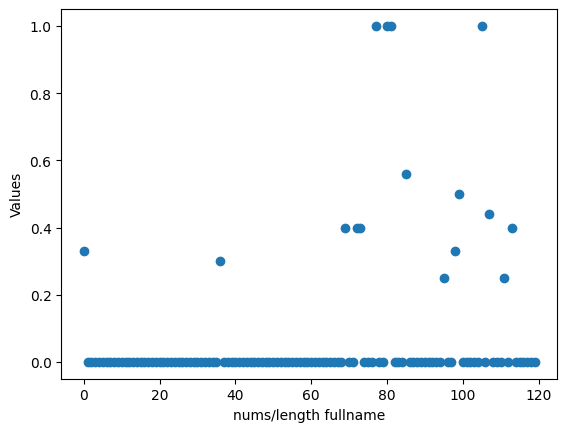

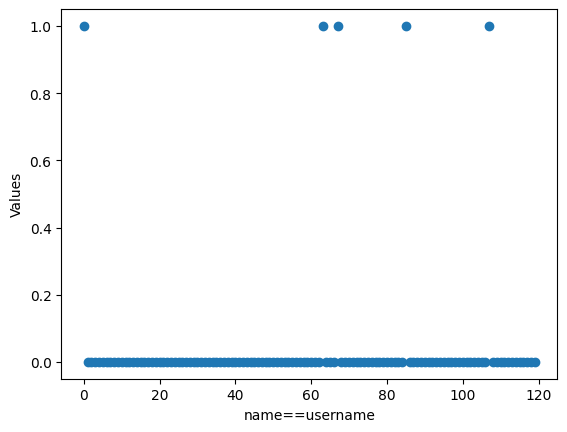

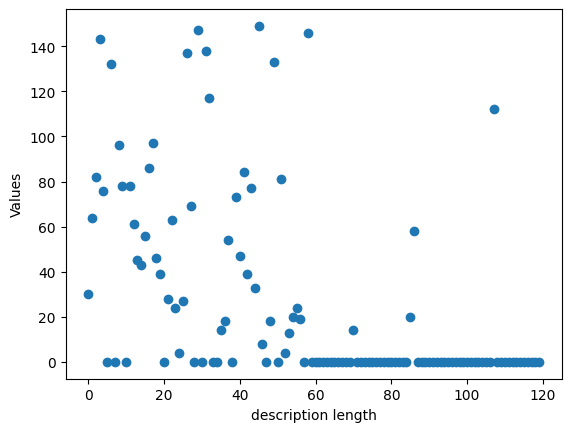

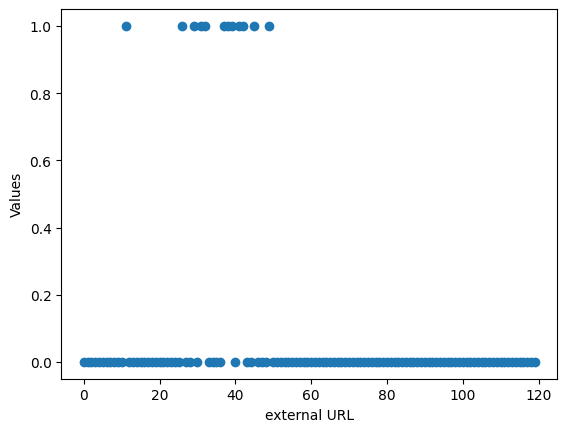

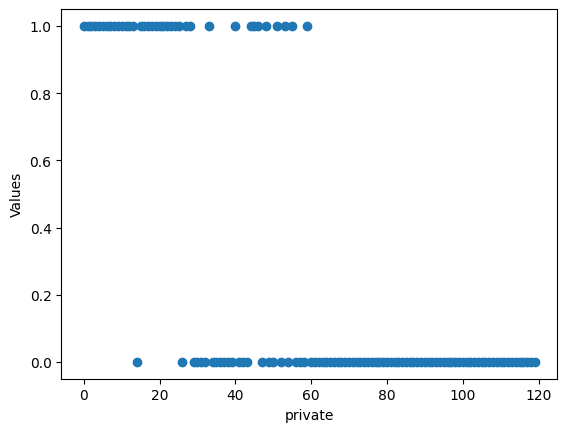

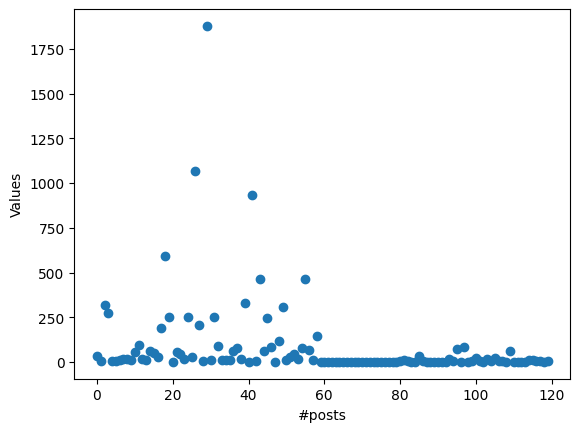

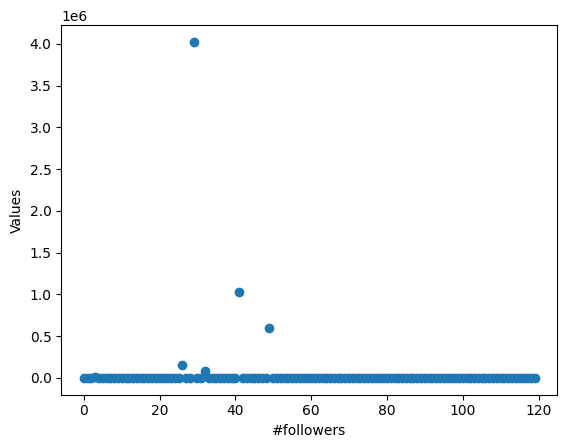

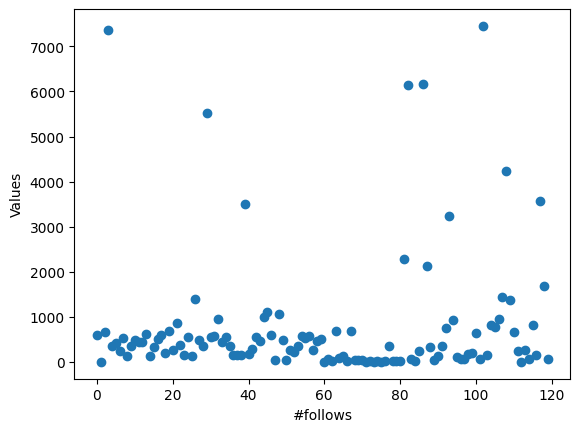

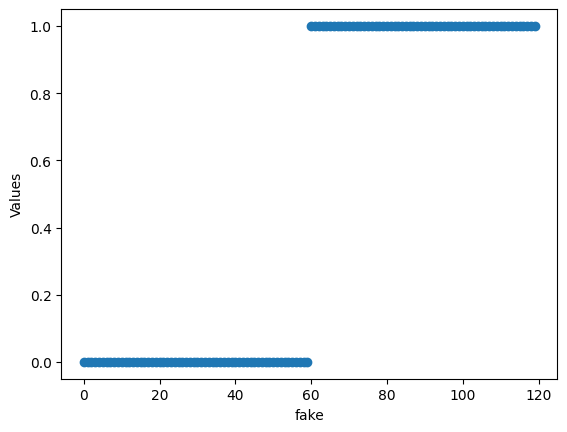

In [11]:
print(testing_data_df.describe())          #觀察資料之各特徵，確認離散與連續變數
print("================================")
# Plotting scatter plots for each feature against index
for feature in testing_data_df.columns:
    plt.scatter(testing_data_df.index, testing_data_df[feature], label=feature)
    plt.xlabel(feature)
    plt.ylabel('Values')
    plt.show()

## Part 2 Data Preprocessing

### 處理outliers
    計算Z-Score,並直接drop掉大於threshold的列

In [12]:
def Del_outliers(data, threshold):
    for feature in features:
        z_scores = (data[feature] - data[feature].mean()) / data[feature].std() #計算Z-Score
        outlier_indices = z_scores[abs(z_scores) > threshold].index     #記錄含OUTLIERS的列，並直接丟掉
        data = data.drop(outlier_indices)
        print(outlier_indices)
    return data

In [13]:
threshold_Num = 3

training_data_df = Del_outliers(training_data_df,threshold_Num)
testing_data_df = Del_outliers(testing_data_df,threshold_Num)

Index([], dtype='int64')
Index([314, 348, 367, 462, 491, 509, 525, 527, 532, 561, 565], dtype='int64')
Index([26, 142, 147, 165, 176, 178, 233, 353], dtype='int64')
Index([194, 312, 323, 325, 329, 357, 368, 381, 388, 428, 433, 439, 441, 451,
       461, 464, 514, 516, 517, 519, 523, 536, 547, 551, 554, 555, 557, 559,
       571, 572],
      dtype='int64')
Index([242, 334, 335, 346, 350, 359, 362, 389, 454, 457, 484, 512, 548, 556], dtype='int64')
Index([105, 130, 132, 139, 149, 173, 214, 245, 366, 398, 414, 442], dtype='int64')
Index([], dtype='int64')
Index([], dtype='int64')
Index([17, 40, 44], dtype='int64')
Index([24, 35, 182, 202], dtype='int64')
Index([115, 136, 154, 156, 175, 276, 355, 400, 419, 535], dtype='int64')
Index([], dtype='int64')
Index([], dtype='int64')
Index([49, 55], dtype='int64')
Index([77, 80, 81, 105], dtype='int64')
Index([0, 63, 67, 85, 107], dtype='int64')
Index([], dtype='int64')
Index([], dtype='int64')
Index([], dtype='int64')
Index([26, 29, 41], dtype='i

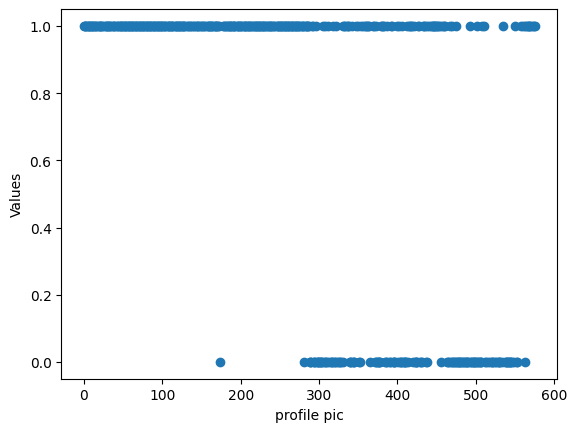

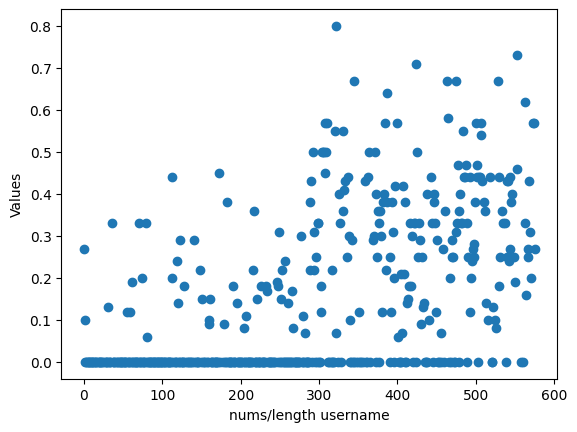

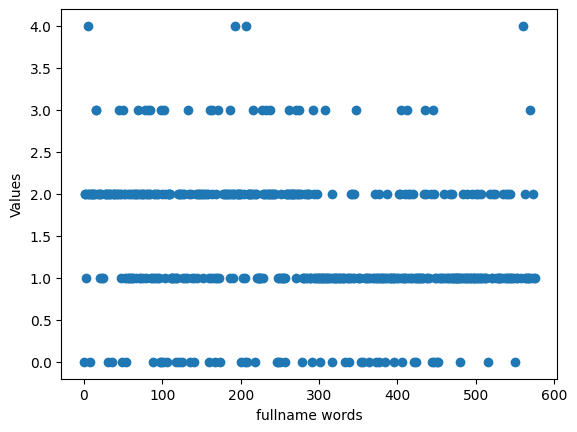

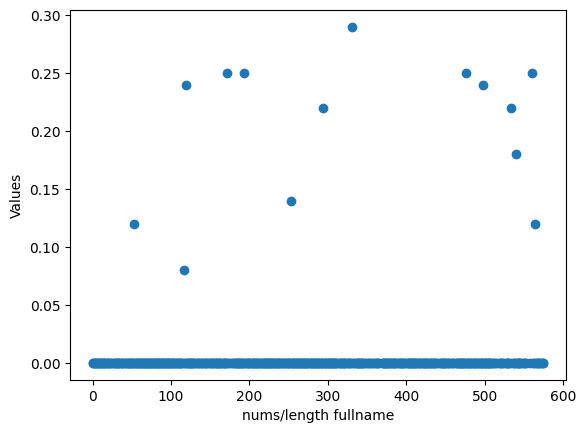

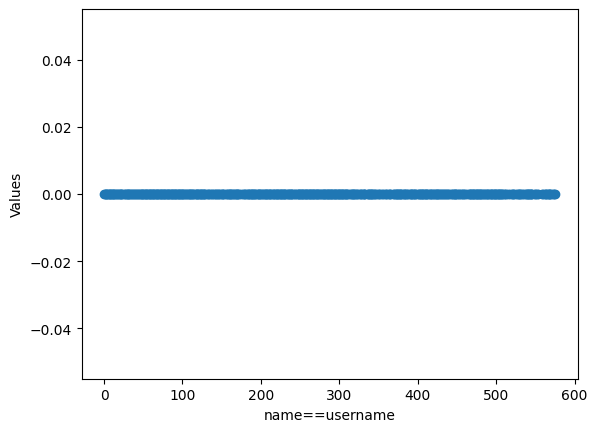

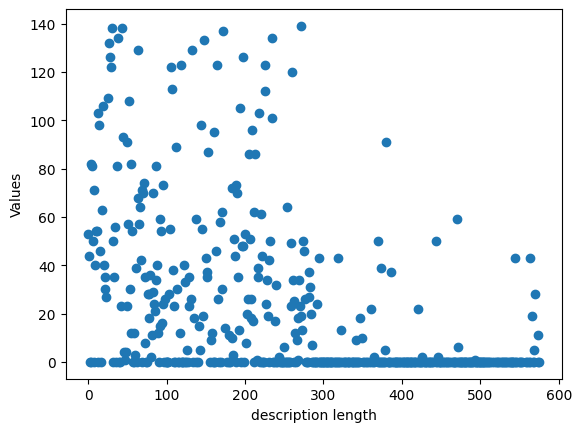

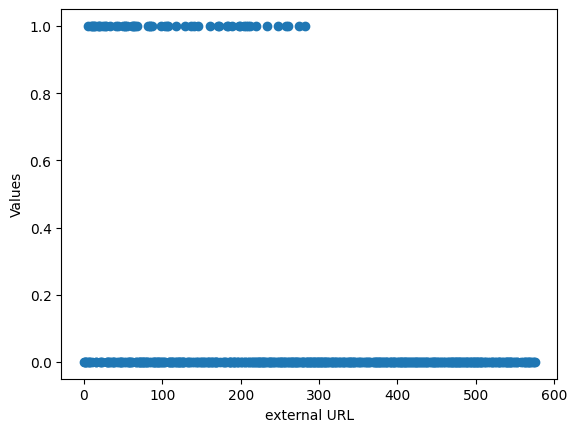

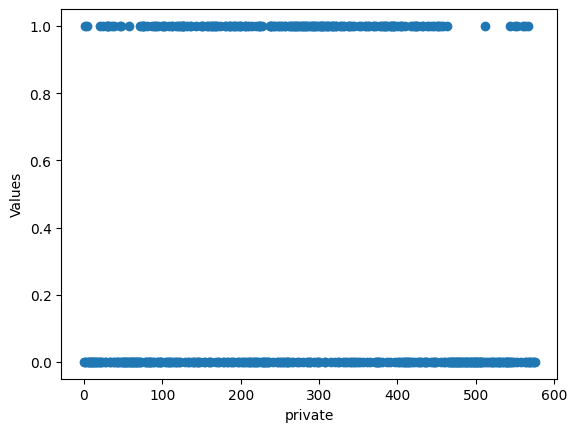

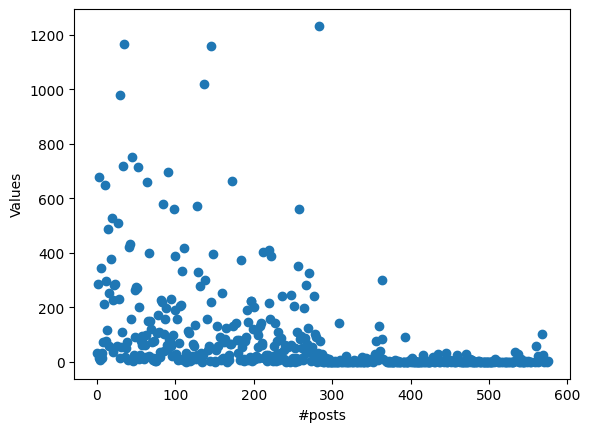

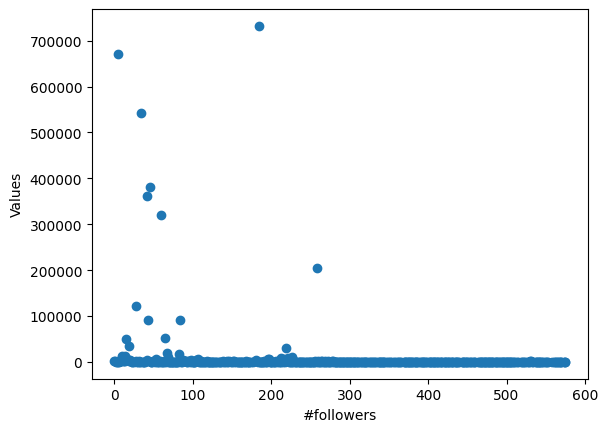

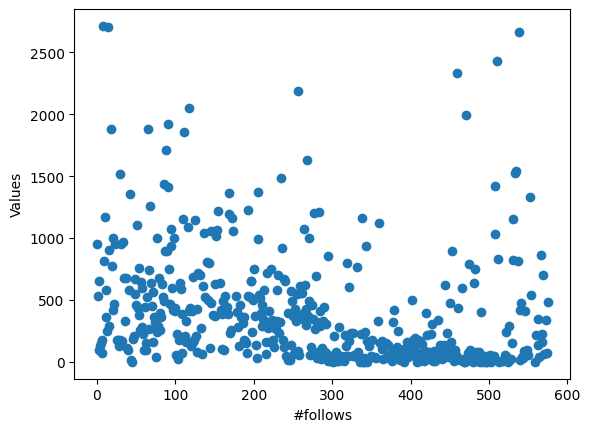

In [14]:
for feature in features:
    plt.scatter(training_data_df.index, training_data_df[feature], label=feature)
    plt.xlabel(feature)
    plt.ylabel('Values')
    plt.show()

### 將連續變數換為離散
discrerte(data,num) : num節點數，將連續變數劃分成區間並設成鄰近節點的值  


In [15]:
discrete_variables = ['profile pic','fullname words', 'name==username', 'external URL', 'private','fake']        #儲存離散變數特徵
continuous_variables = [col for col in training_data_df.columns if col not in discrete_variables]   #儲存連續變數特徵

In [16]:
def discrete(data, num):
    maxValue = max(data)
    minValue = min(data)

    bins = np.linspace(minValue,maxValue,num)       #設定節點數
    DiscreteData = np.digitize(data, bins)      #將區間的值設成鄰近節點值

    return DiscreteData

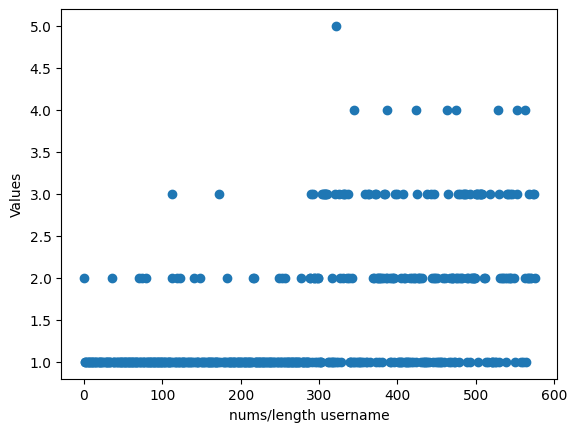

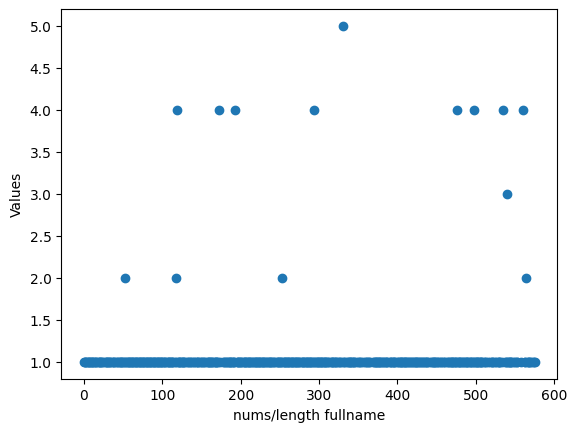

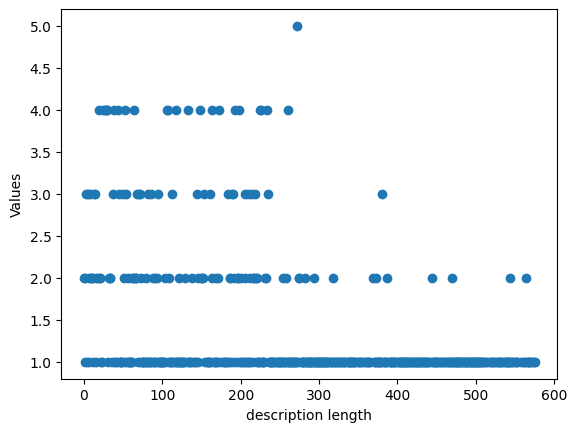

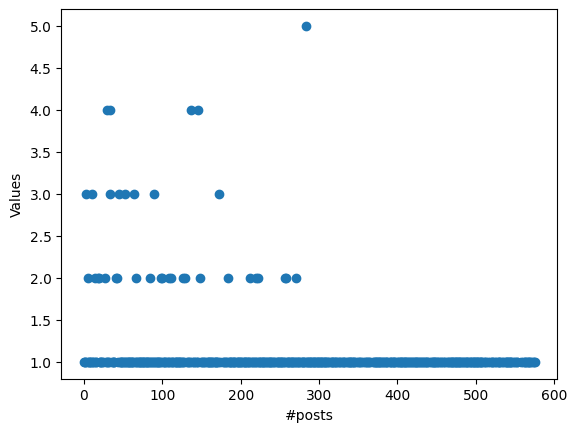

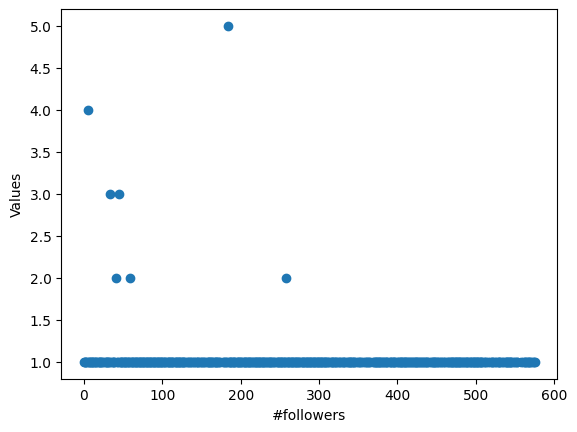

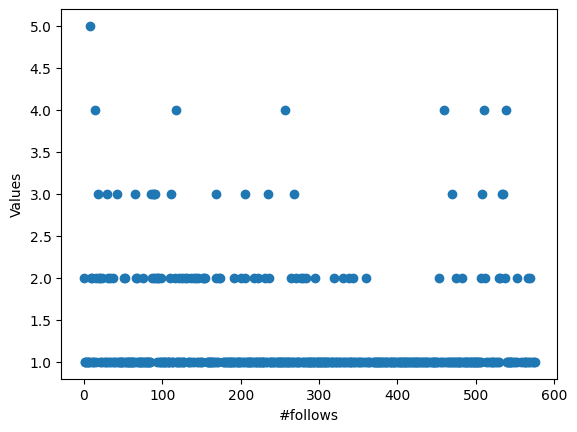

In [17]:
discrete_Num = 5

for continuous in continuous_variables:
    training_data_df[continuous] = discrete(training_data_df[continuous],discrete_Num) #各特徵有五個節點
    plt.scatter(training_data_df.index, training_data_df[continuous], label=continuous)
    plt.xlabel(continuous)
    plt.ylabel('Values')
    plt.show()

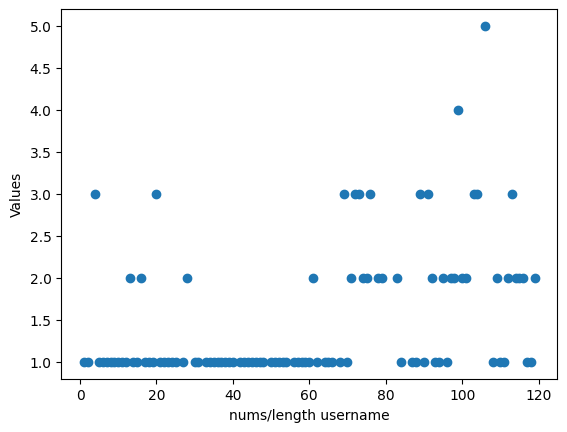

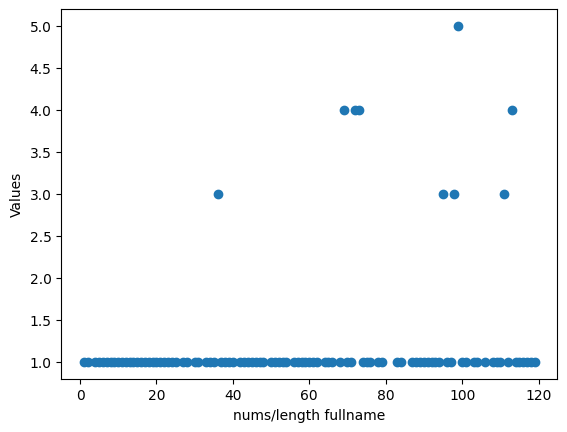

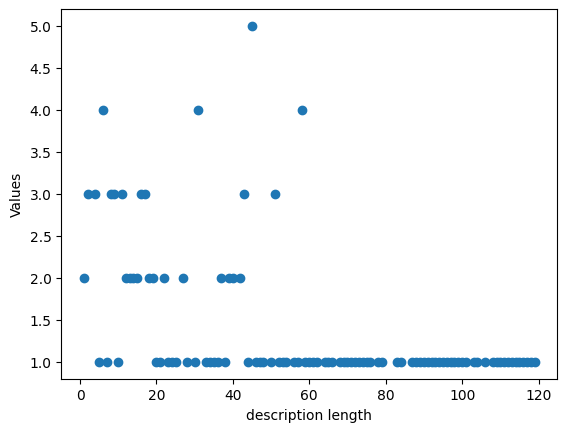

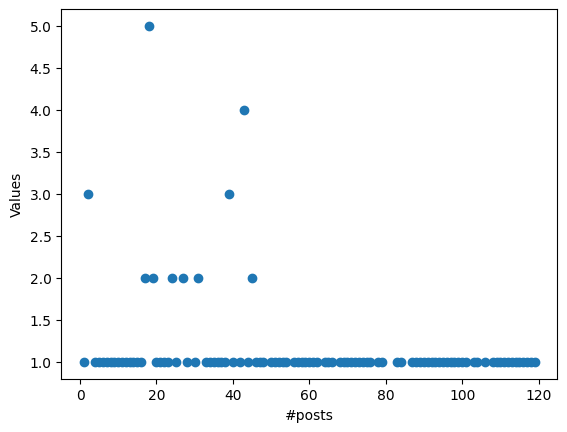

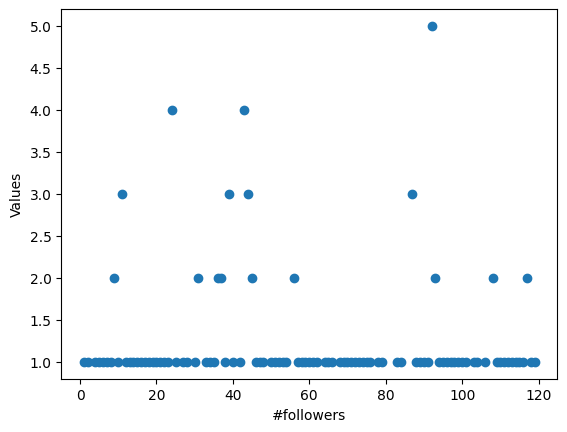

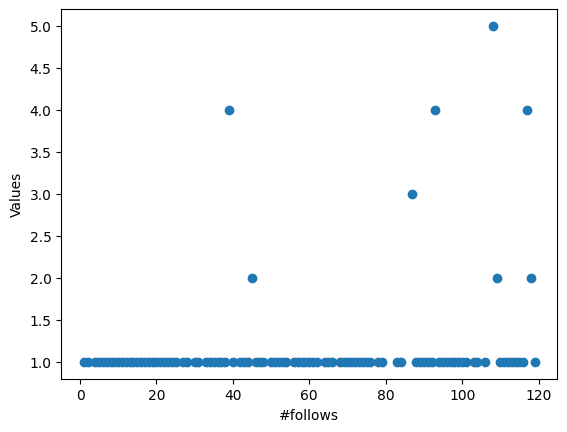

In [18]:
for continuous in continuous_variables:
    testing_data_df[continuous] = discrete(testing_data_df[continuous],discrete_Num)
    plt.scatter(testing_data_df.index, testing_data_df[continuous], label=continuous)
    plt.xlabel(continuous)
    plt.ylabel('Values')
    plt.show()

## Part 3 Model

### Find the most frequent value

In [19]:
def Plurality_Value(data_df):
    plurality = data_df['fake'].mode().iloc[0]  #計算fake中較多為0還是1
    return plurality

def Importance(attribute, examples):
    entropy_before = calculate_entropy(examples['fake']) # 計算下一次split前的entropy

    unique_values = examples[attribute].unique()
    weighted_entropy_after = 0
    for value in unique_values:
        subset = examples[examples[attribute] == value]
        weight = len(subset) / len(examples)
        weighted_entropy_after += weight * calculate_entropy(subset['fake'])    #計算split後的entropy

    gain = entropy_before - weighted_entropy_after  #相減獲得gain，判斷該split是否獲得更好的entropy(有意義的區分資料)
    return gain

def calculate_entropy(labels):
    counts = labels.value_counts()
    probabilities = counts / len(labels)    #該value占比
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy


def Decision_Tree_Learning(examples, attributes, parent_examples=None):
    if examples.empty:      #如果沒有資料，return父節點資料的Plurality_Value
        return Plurality_Value(parent_examples)

    elif examples['fake'].nunique() == 1:   #如果fake皆相同，return fake的結果
        return examples['fake'].iloc[0]

    elif not attributes:                #如果沒有特徵可以繼續區分，return 資料的Plurality_Value
        return Plurality_Value(examples)

    else:

        best_attribute = max(attributes, key=lambda a: Importance(a, examples)) #選擇最重要(能最有效區分)的特徵
        tree = {best_attribute: {}}

        remaining_attributes = [other_attribute for other_attribute in attributes if other_attribute != best_attribute] #從剩下的特徵中繼續劃分

        for value in examples[best_attribute].unique():
            subset = examples[examples[best_attribute] == value]    #取出該特徵各個值的資料，以各個值分別繼續尋找劃分方式
            subtree = Decision_Tree_Learning(subset, remaining_attributes, examples)
            tree[best_attribute][value] = subtree
        return tree

In [20]:
tree = Decision_Tree_Learning(training_data_df, features)

print(tree)

{'profile pic': {1: {'nums/length username': {2: {'description length': {2: {'private': {0: {'#follows': {2: 0, 1: 0, 3: 1}}, 1: 1}}, 1: {'nums/length fullname': {1: {'fullname words': {0: {'#follows': {1: {'private': {1: {'name==username': {0: {'external URL': {0: {'#posts': {1: {'#followers': {1: 0}}}}}}}}, 0: 1}}, 4: 0, 2: 1}}, 2: {'external URL': {0: {'#follows': {1: {'private': {1: {'name==username': {0: {'#posts': {1: {'#followers': {1: 0}}}}}}, 0: {'name==username': {0: {'#posts': {1: {'#followers': {1: 1}}}}}}}}, 2: 0}}, 1: 0}}, 1: {'#follows': {1: {'private': {0: {'name==username': {0: {'external URL': {0: {'#posts': {1: {'#followers': {1: 1}}}}}}}}, 1: {'name==username': {0: {'external URL': {0: {'#posts': {1: {'#followers': {1: 1}}}}}}}}}}, 4: 1, 2: 1}}, 3: 1}}, 4: {'fullname words': {1: 0, 2: 1}}, 2: 0}}, 3: 0, 4: 0}}, 1: {'fullname words': {2: {'#follows': {1: {'private': {0: {'description length': {2: 0, 1: {'external URL': {0: {'#followers': {1: {'nums/length fullname': 

In [21]:
def predict(tree, instance):
    if isinstance(tree, dict):  # Node 為內部節點，需繼續traverse
        attribute = list(tree.keys())[0]
        subtree = tree[attribute]
        attribute_value = instance.get(attribute, None)

        if attribute_value in subtree:  #如果該值為tree的分支
            return predict(subtree[attribute_value], instance)  #前往該分支的subtree
        else:
            return 0        #若沒有，則return預設值0
    else:   # Node 為葉節點，return 預測結果
        return tree


In [22]:
def Predicting(tree,predictions):
    for index, instance in testing_data_df.iterrows():      # traverse test data的每一列資料
        instance_dict = instance.to_dict()
        prediction = predict(tree, instance_dict)
        predictions.append(prediction)
    return predictions

def PrintAcc(predictions):
    testing_data_df['predict'] = predictions
    actual_labels = testing_data_df['fake']
    predicted_labels = testing_data_df['predict']
    accuracy = sum(actual_labels == predicted_labels) / len(actual_labels)
    print(f'Accuracy: {accuracy * 100:.2f}%')
    return accuracy * 100

In [23]:
pred = []
pred = Predicting(tree,pred)
Acc = PrintAcc(pred)

Accuracy: 88.12%


## Part 4 Optimization

### 1. 運用不同方式判斷與處理outliers

以Z-Score判斷，大於threshold者為outliers，並以 ***threshold內最大值替代***

In [24]:
def replace_outliers_with_Max(data, threshold):
    for feature in features:
        z_scores = (data[feature] - data[feature].mean()) / data[feature].std()
        outlier_indices = z_scores[abs(z_scores) > threshold].index #計算Z-Score

        non_outliers = data.index.difference(outlier_indices)
        if non_outliers.any():
            max_value = data.loc[non_outliers, feature].max()   #記錄含OUTLIERS的列，並以最大值替代
            data.loc[outlier_indices, feature] = max_value
    return data

設定 ***上下限***，範圍外為Outliers，並以 ***上下限之值替代***

In [25]:
def Winsorizing_outliers(data, lower_limit, upper_limit):
    for col in data :
        if col != 'fake':
            series = data[col]
            lower_bound = series.quantile(lower_limit)      #計算上下限
            upper_bound = series.quantile(upper_limit)
            series[series < lower_bound] = lower_bound      #以上下限之值替代
            series[series > upper_bound] = upper_bound
            data[col] = series
    return data

In [26]:
Lower= 0.05
Upper = 0.95
threshold_Num = 4

In [27]:
training_data_df = pd.read_csv('data/train.csv',encoding='utf-8-sig')
testing_data_df = pd.read_csv('data/test.csv',encoding='utf-8-sig')

training_data_df = Winsorizing_outliers(training_data_df,Lower,Upper)
testing_data_df = Winsorizing_outliers(testing_data_df,Lower,Upper)

for continuous in continuous_variables:
    training_data_df[continuous] = discrete(training_data_df[continuous],discrete_Num)
    testing_data_df[continuous] = discrete(testing_data_df[continuous],discrete_Num)

Winsorizing_tree = Decision_Tree_Learning(training_data_df, features)
Winsorising_pred = []
Winsorising_pred = Predicting(Winsorizing_tree,Winsorising_pred)
print('Winsorising')
print('Lower',Lower,'Upper',Upper,'discrete_num',discrete_Num)
Winsorising_Acc = PrintAcc(Winsorising_pred)

C:\Users\lynn9106\AppData\Local\Temp\ipykernel_29180\2233300859.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series[series < lower_bound] = lower_bound
C:\Users\lynn9106\AppData\Local\Temp\ipykernel_29180\2233300859.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series[series > upper_bound] = upper_bound
C:\Users\lynn9106\AppData\Local\Temp\ipykernel_29180\2233300859.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  serie

Winsorising
Lower 0.05 Upper 0.95 discrete_num 5
Accuracy: 87.50%


In [28]:
training_data_df = pd.read_csv('data/train.csv',encoding='utf-8-sig')
testing_data_df = pd.read_csv('data/test.csv',encoding='utf-8-sig')

training_data_df = replace_outliers_with_Max(training_data_df,threshold_Num)
testing_data_df = replace_outliers_with_Max(testing_data_df,threshold_Num)

for continuous in continuous_variables:
    training_data_df[continuous] = discrete(training_data_df[continuous],discrete_Num)
    testing_data_df[continuous] = discrete(testing_data_df[continuous],discrete_Num)

replaceMax_tree = Decision_Tree_Learning(training_data_df, features)
replaceMax_pred = []
replaceMax_pred = Predicting(replaceMax_tree,replaceMax_pred)
print('replaceMax')
print('threshold',threshold_Num,'discrete_num',discrete_Num)
replaceMax_Acc = PrintAcc(replaceMax_pred)

replaceMax
threshold 4 discrete_num 5
Accuracy: 88.33%


### 2. 更改連續變數節點切割數量 

In [41]:
discrete_Num = 4

In [42]:
training_data_df = pd.read_csv('data/train.csv',encoding='utf-8-sig')
testing_data_df = pd.read_csv('data/test.csv',encoding='utf-8-sig')

training_data_df = Winsorizing_outliers(training_data_df,Lower,Upper)
testing_data_df = Winsorizing_outliers(testing_data_df,Lower,Upper)

for continuous in continuous_variables:
    training_data_df[continuous] = discrete(training_data_df[continuous],discrete_Num)
    testing_data_df[continuous] = discrete(testing_data_df[continuous],discrete_Num)

Winsorizing_tree_3 = Decision_Tree_Learning(training_data_df, features)
Winsorising_pred = []
Winsorising_pred = Predicting(Winsorizing_tree_3,Winsorising_pred)
print('Winsorising')
print('Lower',Lower,'Upper',Upper,'discrete_num',discrete_Num)
Winsorising_Acc = PrintAcc(Winsorising_pred)

C:\Users\lynn9106\AppData\Local\Temp\ipykernel_29180\2233300859.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series[series < lower_bound] = lower_bound
C:\Users\lynn9106\AppData\Local\Temp\ipykernel_29180\2233300859.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series[series > upper_bound] = upper_bound
C:\Users\lynn9106\AppData\Local\Temp\ipykernel_29180\2233300859.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  serie

Winsorising
Lower 0.05 Upper 0.95 discrete_num 4
Accuracy: 90.83%


In [40]:
threshold_Num = 5

training_data_df = pd.read_csv('data/train.csv',encoding='utf-8-sig')
testing_data_df = pd.read_csv('data/test.csv',encoding='utf-8-sig')

training_data_df = replace_outliers_with_Max(training_data_df,threshold_Num)
testing_data_df = replace_outliers_with_Max(testing_data_df,threshold_Num)

for continuous in continuous_variables:
    training_data_df[continuous] = discrete(training_data_df[continuous],discrete_Num)
    testing_data_df[continuous] = discrete(testing_data_df[continuous],discrete_Num)

replaceMax_tree_3 = Decision_Tree_Learning(training_data_df, features)
replaceMax_pred = []
replaceMax_pred = Predicting(replaceMax_tree_3,replaceMax_pred)
print('replaceMax')
print('threshold',threshold_Num,'discrete_num',discrete_Num)
replaceMax_Acc = PrintAcc(replaceMax_pred)

replaceMax
threshold 5 discrete_num 4
Accuracy: 90.00%


## Part 5 Explaination

In [47]:
from graphviz import Digraph

graph = Digraph(comment='DecisionTree')  # 創建一個 Digraph

NodeIndex = 0

def visTree(tree, parent=None, weight=None):
    global graph
    global NodeIndex

    for child_name, child_value in tree.items():
        if isinstance(child_value, dict):       # 如果子節點的值是字典，表示為內部節點
            if child_name not in features:  # 如果子節點名稱不在 features 中，表示為數值型節點
                print('===Num===')
                print('Weight: ', child_name)
                weight = int(child_name)
            else:
                print('===attributes===')
                print('NodeId: ', NodeIndex)
                print('Label: ',child_name)
                graph.node(str(NodeIndex), label=child_name)     # 在 Graphviz 中添加內部節點，設定標籤為child_name
                if parent is not None and weight is not None:
                    print('Node',parent, 'to', NodeIndex, ' weight: ', weight)
                    graph.edge(str(parent), str(NodeIndex), label=str(weight))
                parent = NodeIndex
                weight = None
                NodeIndex = NodeIndex + 1


            visTree(child_value, parent, weight)    # 遞迴呼叫 visTree，繼續處理內部節點的子節點
        else:
            print('===Leaf===')
            print('NodeId: ', NodeIndex)
            print('Label: ',child_value)
            print('Node', parent, 'to', NodeIndex, ' weight: ', child_name)
            graph.node(str(NodeIndex), label= str(child_value))     # 在 Graphviz 中添加葉節點，設定標籤為葉節點的值
            graph.edge(str(parent), str(NodeIndex), label=str(int(child_name)))       # 在 Graphviz 中添加edge，表示特徵和其值的關係
            NodeIndex = NodeIndex + 1


In [48]:
visTree(Winsorizing_tree_3)

graph.render('decision_tree', format='png', cleanup=True)
graph.view('decision_tree')         #輸出及顯示圖片

===attributes===
NodeId:  0
Label:  profile pic
===Num===
Weight:  1
===attributes===
NodeId:  1
Label:  nums/length username
Node 0 to 1  weight:  1
===Num===
Weight:  2
===attributes===
NodeId:  2
Label:  fullname words
Node 1 to 2  weight:  2
===Num===
Weight:  0
===attributes===
NodeId:  3
Label:  #follows
Node 2 to 3  weight:  0
===Num===
Weight:  2
===attributes===
NodeId:  4
Label:  description length
Node 3 to 4  weight:  2
===Leaf===
NodeId:  5
Label:  0
Node 4 to 5  weight:  2
===Leaf===
NodeId:  6
Label:  1
Node 4 to 6  weight:  1
===Num===
Weight:  1
===attributes===
NodeId:  7
Label:  description length
Node 3 to 7  weight:  1
===Num===
Weight:  1
===attributes===
NodeId:  8
Label:  private
Node 7 to 8  weight:  1
===Num===
Weight:  1
===attributes===
NodeId:  9
Label:  nums/length fullname
Node 8 to 9  weight:  1
===Num===
Weight:  1
===attributes===
NodeId:  10
Label:  name==username
Node 9 to 10  weight:  1
===Num===
Weight:  0
===attributes===
NodeId:  11
Label:  exter

'decision_tree.pdf'